In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Coordenadas de las ciudades para el problema del vendedor viajero
cities = {
    "Aguascalientes": (21.8853, -102.2916),
    "Mexicali": (32.6245, -115.4523),
    "La Paz": (24.1426, -110.3128),
    "San Francisco de Campeche": (19.8450, -90.5230),
    "Tuxtla Gutiérrez": (16.7528, -93.1156),
    "Chihuahua": (28.6353, -106.0889),
    "Ciudad de México": (19.4326, -99.1332),
    "Saltillo": (25.4232, -101.0053),
    "Colima": (19.2433, -103.7250),
    "Victoria de Durango": (24.0277, -104.6532),
    "Toluca": (19.2826, -99.6557),
    "Guanajuato": (21.0190, -101.2574),
    "Chilpancingo": (17.5514, -99.5006),
    "Pachuca": (20.1011, -98.7591),
    "Guadalajara": (20.6597, -103.3496),
    "Morelia": (19.7008, -101.1844),
    "Cuernavaca": (18.9261, -99.2308),
    "Tepic": (21.5067, -104.8940),
    "Monterrey": (25.6866, -100.3161),
    "Oaxaca de Juárez": (17.0732, -96.7266),
    "Puebla": (19.0414, -98.2063),
    "Santiago de Querétaro": (20.5888, -100.3899),
    "Chetumal": (18.5001, -88.2961),
    "San Luis Potosí": (22.1565, -100.9855),
    "Culiacán": (24.8091, -107.3940),
    "Hermosillo": (29.0729, -110.9559),
    "Villahermosa": (17.9895, -92.9475),
    "Ciudad Victoria": (23.7369, -99.1411),
    "Tlaxcala de Xicohténcatl": (19.3139, -98.2400),
    "Xalapa": (19.5423, -96.9100),
    "Mérida": (20.9674, -89.5926),
    "Zacatecas": (22.7709, -102.5833),
}

In [14]:
# Crear la matriz de distancias
city_names = list(cities.keys())
num_cities = len(city_names)
distance_matrix = np.zeros((num_cities, num_cities))

In [15]:
def calculate_distance(coord1, coord2):
    from math import radians, sin, cos, sqrt, atan2
    R = 6371  # Radio de la Tierra en km
    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [16]:
for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            distance_matrix[i, j] = calculate_distance(
                cities[city_names[i]], cities[city_names[j]]
            )

In [17]:
# Función para generar la población inicial
def pob_inicial(N):
    return [random.sample(range(num_cities), num_cities) for _ in range(N)]

In [18]:
# Parámetros de costos
seller_hour_cost = 200  # MXN por hora del vendedor
fuel_price_per_liter = 24.0  # MXN por litro de combustible
car_efficiency_km_per_l = 15  # Rendimiento del auto (km/l)
speed_kmh = 80  # Velocidad promedio (km/h)
toll_rate_per_km = 0.5  # Tarifa promedio de peaje (MXN/km)

In [19]:
def route_cost(route):
    total_cost = 0
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]
        distance = distance_matrix[city1, city2]
        
        # Cálculos
        travel_time = distance / speed_kmh
        cost_time = travel_time * seller_hour_cost
        cost_toll = distance * toll_rate_per_km
        cost_fuel = (distance / car_efficiency_km_per_l) * fuel_price_per_liter
        
        # Sumar costos
        total_cost += cost_time + cost_toll + cost_fuel

    # Regreso a la ciudad inicial
    distance = distance_matrix[route[-1], route[0]]
    travel_time = distance / speed_kmh
    cost_time = travel_time * seller_hour_cost
    cost_toll = distance * toll_rate_per_km
    cost_fuel = (distance / car_efficiency_km_per_l) * fuel_price_per_liter
    total_cost += cost_time + cost_toll + cost_fuel

    return total_cost

In [20]:
# Función de mutación: intercambio de dos ciudades
def mutacion(route):
    idx1, idx2 = random.sample(range(num_cities), 2)
    route[idx1], route[idx2] = route[idx2], route[idx1]
    return route

In [21]:
# Función de cruzamiento
def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(num_cities), 2))
    child = [-1] * num_cities
    child[start:end] = parent1[start:end]
    pointer = end
    for city in parent2:
        if city not in child:
            child[pointer % num_cities] = city
            pointer += 1
    return child

In [22]:
# Algoritmo evolutivo
def algoritmo_evolutivo(pob_size, num_generations, mutation_rate):
    population = pob_inicial(pob_size)
    best_route = None
    best_cost = float('inf')

    for generation in range(num_generations):
        # Evaluar población
        costs = [route_cost(route) for route in population]
        sorted_indices = np.argsort(costs)
        population = [population[i] for i in sorted_indices]
        costs = [costs[i] for i in sorted_indices]

        # Guardar el mejor
        if costs[0] < best_cost:
            best_cost = costs[0]
            best_route = population[0]

        # Generar nueva población
        new_population = population[:2]  # Elitismo: los 2 mejores pasan directamente
        while len(new_population) < pob_size:
            parent1, parent2 = random.choices(population[:10], k=2)  # Torneo de los 10 mejores
            child = crossover(parent1, parent2)
            if random.random() < mutation_rate:
                child = mutacion(child)
            new_population.append(child)

        population = new_population

        print(f"Generación {generation + 1}: Mejor costo = {best_cost:.2f}")

    return best_route, best_cost

In [23]:
# Ejecutar el algoritmo
best_route, best_cost = algoritmo_evolutivo(pob_size=100, num_generations=500, mutation_rate=0.1)
print(f"Mejor ruta: {best_route}")
print(f"Costo de la mejor ruta: {best_cost}")

Generación 1: Mejor costo = 107598.69
Generación 2: Mejor costo = 92565.00
Generación 3: Mejor costo = 87863.66
Generación 4: Mejor costo = 78601.34
Generación 5: Mejor costo = 75061.88
Generación 6: Mejor costo = 73296.02
Generación 7: Mejor costo = 72841.28
Generación 8: Mejor costo = 68235.27
Generación 9: Mejor costo = 61433.86
Generación 10: Mejor costo = 61433.86
Generación 11: Mejor costo = 56597.62
Generación 12: Mejor costo = 50798.11
Generación 13: Mejor costo = 50798.11
Generación 14: Mejor costo = 50001.39
Generación 15: Mejor costo = 48991.05
Generación 16: Mejor costo = 48991.05
Generación 17: Mejor costo = 48991.05
Generación 18: Mejor costo = 48087.93
Generación 19: Mejor costo = 48010.88
Generación 20: Mejor costo = 48010.88
Generación 21: Mejor costo = 48010.88
Generación 22: Mejor costo = 48010.88
Generación 23: Mejor costo = 47866.12
Generación 24: Mejor costo = 47866.12
Generación 25: Mejor costo = 47866.12
Generación 26: Mejor costo = 47740.56
Generación 27: Mejor

In [24]:
# Visualizar la mejor ruta
def plot_route(route, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(route)):
        city1, city2 = route[i], route[(i + 1) % len(route)]
        plt.plot(
            [cities[city_names[city1]][1], cities[city_names[city2]][1]],
            [cities[city_names[city1]][0], cities[city_names[city2]][0]],
            'b-o'
        )
    plt.title(title)
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.show()

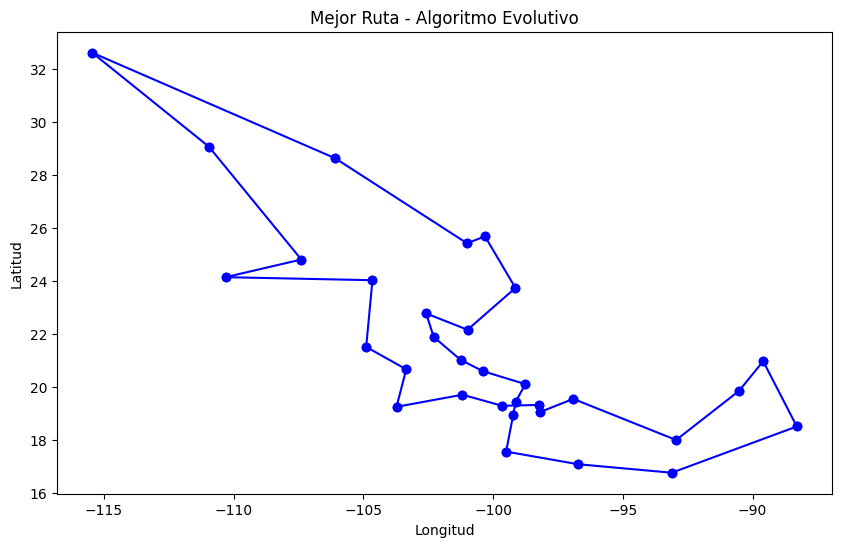

In [25]:
plot_route(best_route, "Mejor Ruta - Algoritmo Evolutivo")